# Konnektor - Building Ligand Networks

this is Konnektor, which you can use to construct different types of Networks.

In [125]:
import numpy as np
from rdkit import Chem

try:
    from kartograf import KartografAtomMapper, MappingRMSDScorer
except ModuleNotFoundError:
    !{sys.executable} -m pip install git+https://github.com/OpenFreeEnergy/kartograf.git
    from kartograf import KartografAtomMapper, MappingRMSDScorer


import logging
from kartograf.atom_mapper import logger
logger.setLevel(logging.ERROR)


In [126]:
from konnektor.utils.toy_data import build_random_dataset

components, mapper, scorer = build_random_dataset(n_compounds=30)

from konnektor.visualization import draw_ligand_network


# Star Network Layout

In [127]:
from konnektor.network_planners import StarNetworkGenerator
ligand_network_planner = StarNetworkGenerator(mapper=mapper, scorer=scorer)

In [128]:
star_network = ligand_network_planner(components)
star_network.name="Star Network"
star_network

<LigandNetwork-4f0d8011b2f473788e23de9b862773a1>

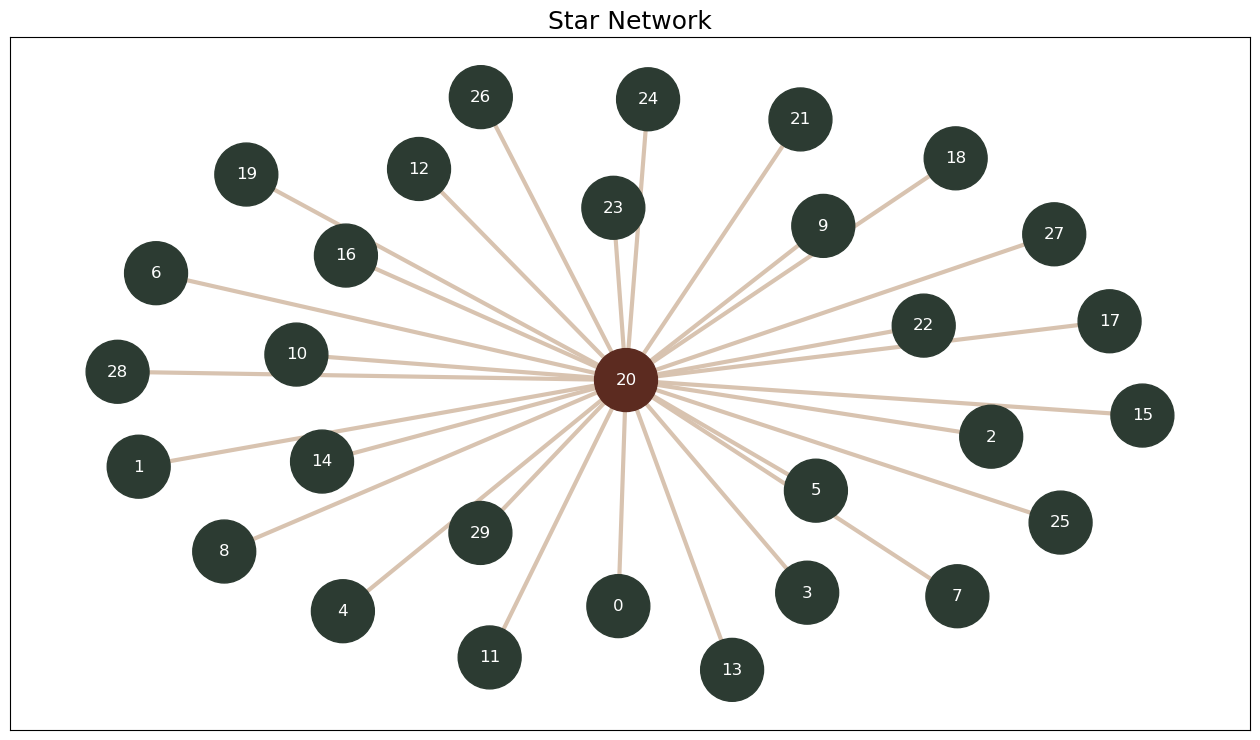

In [129]:
draw_ligand_network(network=star_network, title=star_network.name);

## Twin Star Network

In [130]:
from konnektor.network_planners import TwinStarNetworkGenerator
ligand_network_planner = TwinStarNetworkGenerator(mapper=mapper, scorer=scorer)

In [131]:
twin_star_network = ligand_network_planner(components)
twin_star_network.name="Twin Star Network"
twin_star_network

<LigandNetwork-50861a2538e90bfbbc2a662ac2715be3>

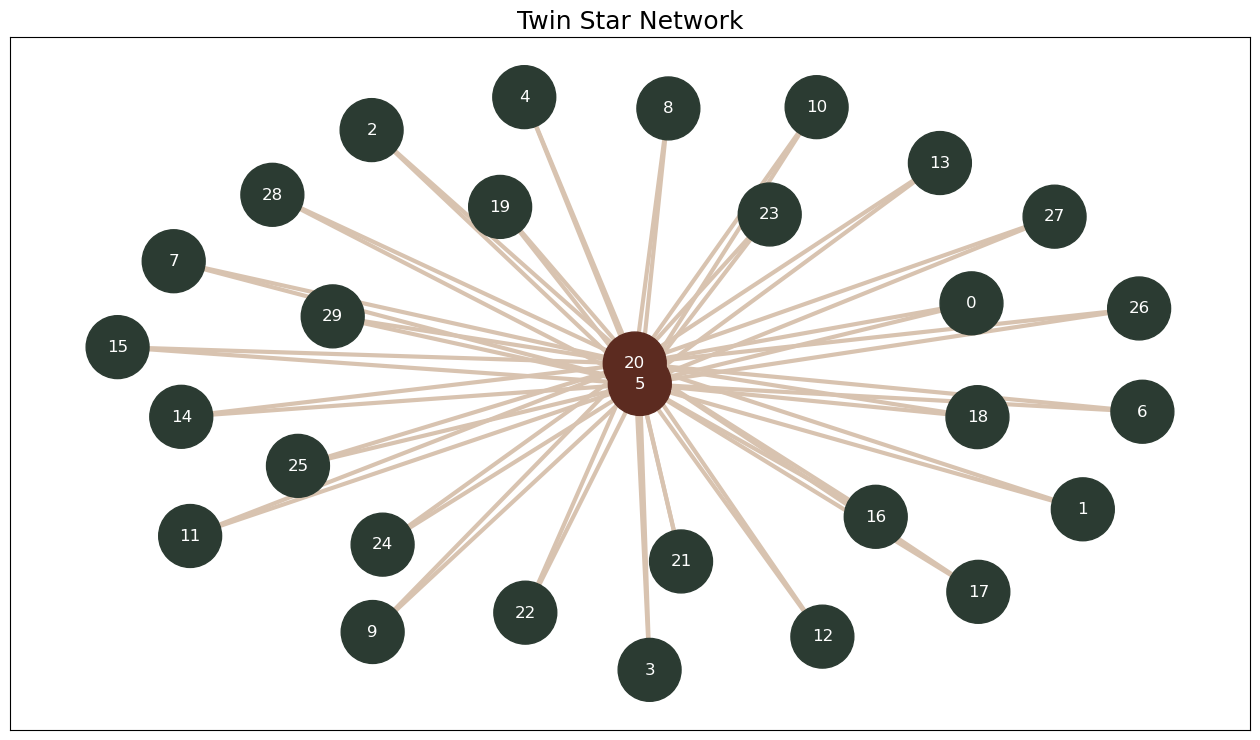

In [132]:
draw_ligand_network(network=twin_star_network, title=twin_star_network.name);

## Starry Sky Network Layout

In [133]:
from konnektor.network_planners import StarrySkyNetworkGenerator

ligand_network_planner = StarrySkyNetworkGenerator(mapper=mapper, 
                                                   scorer=scorer)

In [134]:
starry_sky_network = ligand_network_planner(components)
starry_sky_network.name="Starry Sky Network"
starry_sky_network

<LigandNetwork-968074558fe5e51cb9e2a69c7e7bb974>

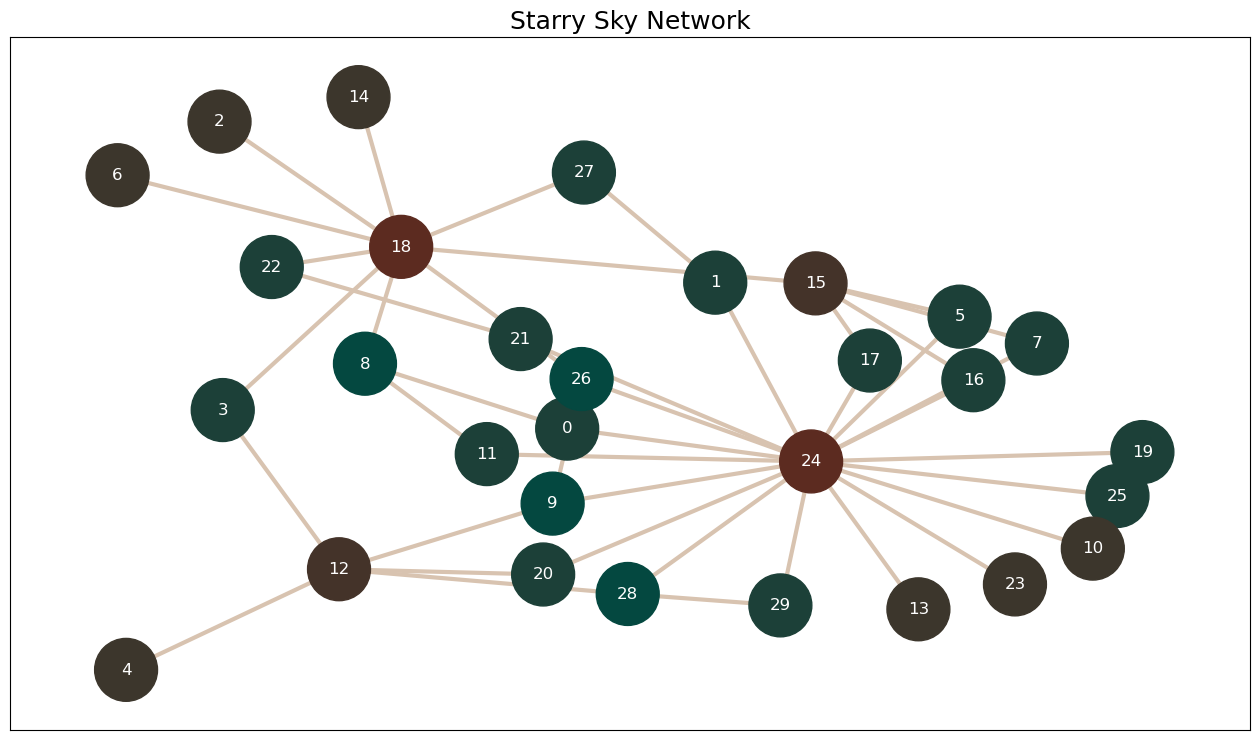

In [135]:
draw_ligand_network(network=starry_sky_network, title=starry_sky_network.name);

# NEdges Node Network

In [136]:
from konnektor.network_planners import NNodeEdgesNetworkGenerator

ligand_network_planner = NNodeEdgesNetworkGenerator(mapper=mapper, scorer=scorer)


In [137]:
nedges_network = ligand_network_planner(components)
nedges_network.name="N-Edges Network"
nedges_network

<LigandNetwork-ef350239907a0e4c1b61cf8c6fdff2f9>

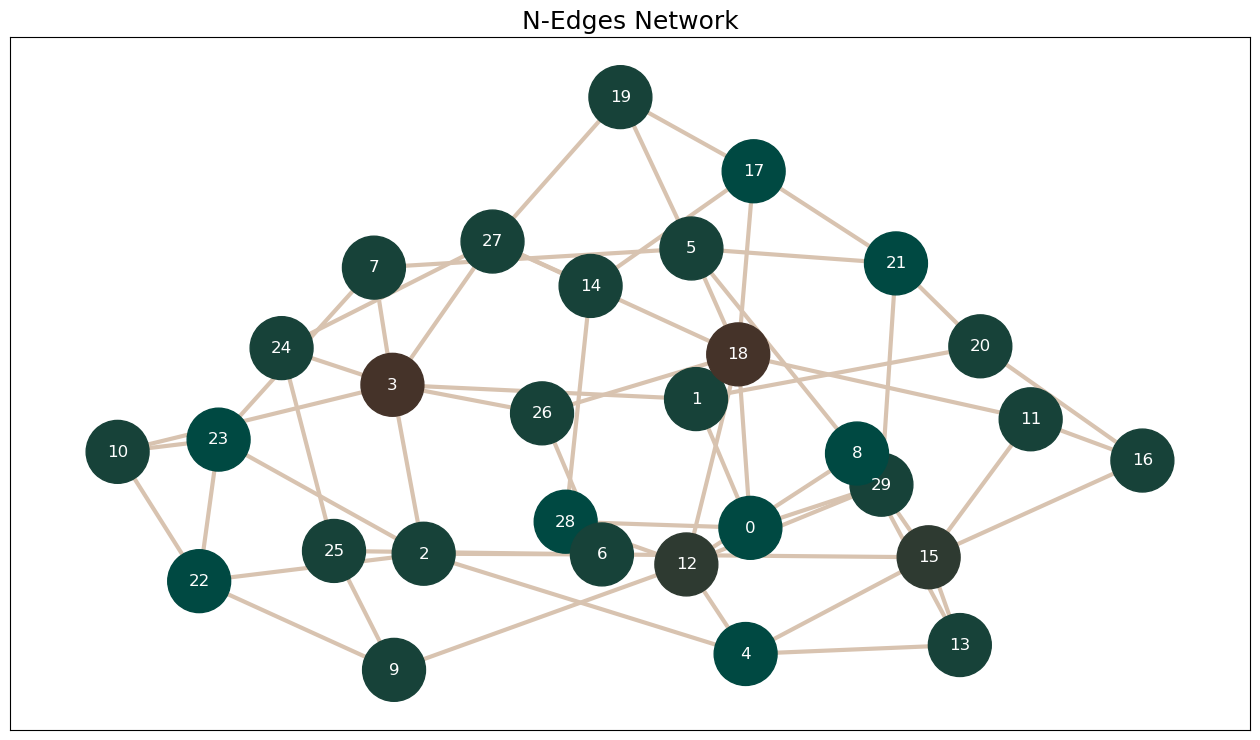

In [138]:
draw_ligand_network(network=nedges_network, title=nedges_network.name);

# Minimal Spanning Tree

In [139]:
from konnektor.network_planners import MinimalSpanningTreeNetworkGenerator

ligand_network_planner = MinimalSpanningTreeNetworkGenerator(mapper=mapper, scorer=scorer)


In [140]:
mst_network = ligand_network_planner(components)
mst_network.name="Min Spanning Tree Network"
mst_network

<LigandNetwork-f21492c7aaea3bf084fd421ca4d71f58>

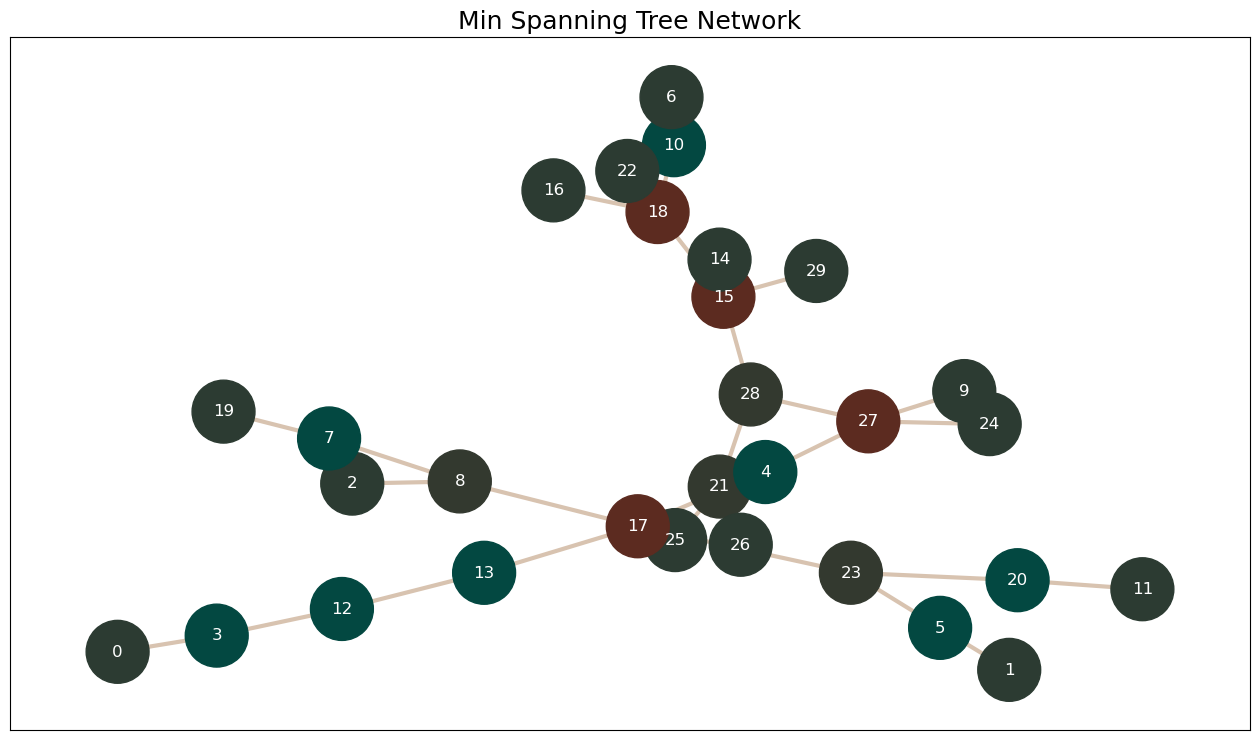

In [141]:
draw_ligand_network(network=mst_network, title=mst_network.name);

# Redundant MST

In [142]:
from konnektor.network_planners import RedundantMinimalSpanningTreeNetworkGenerator

ligand_network_planner = (RedundantMinimalSpanningTreeNetworkGenerator
                          (mapper=mapper, scorer=scorer,
                           n_redundancy=2))


In [143]:
rmst_network = ligand_network_planner(components)
rmst_network.name="Redundant Min Spanning\n Tree Network"
rmst_network

<LigandNetwork-2179dc97ca47a563d6f1714db3fa7908>

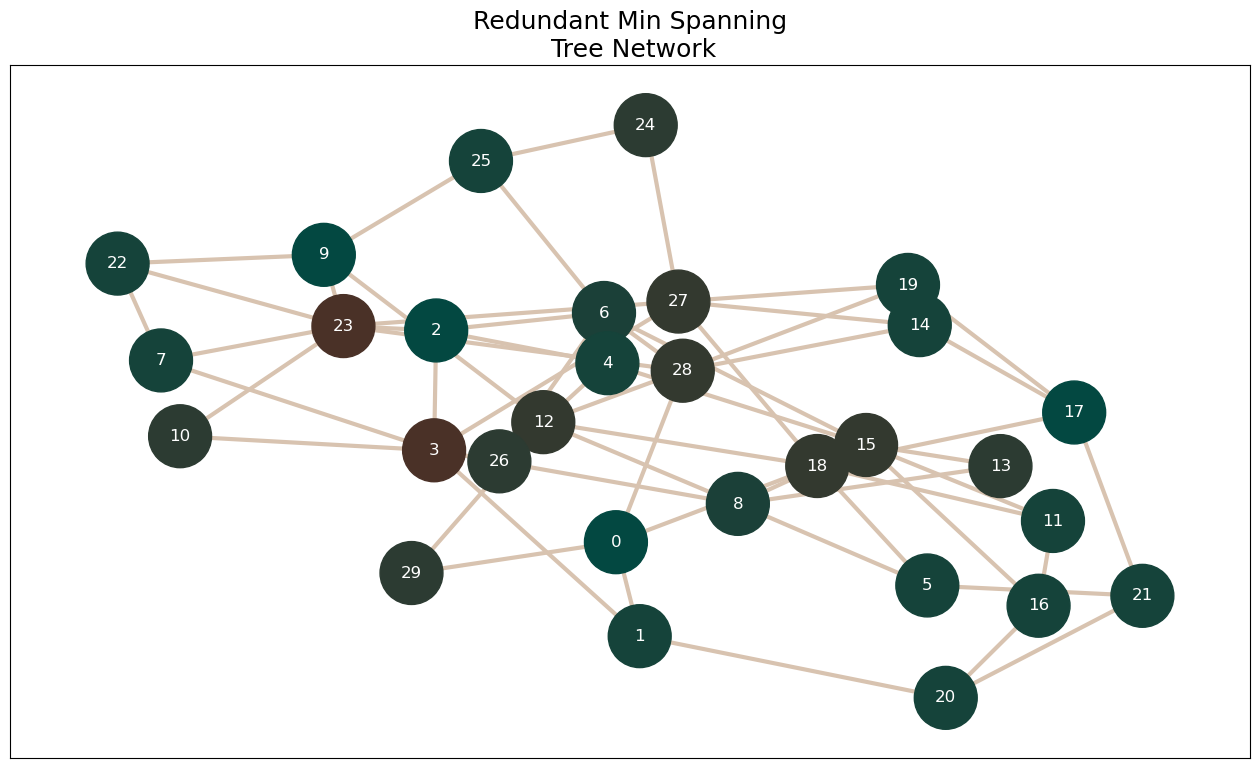

In [144]:
draw_ligand_network(network=rmst_network, title=rmst_network.name);

# Cyclo Graphs

In [145]:
from konnektor.network_planners import CyclicNetworkGenerator
ligand_network_planner = CyclicNetworkGenerator(mapper=mapper, scorer=scorer,
                                                    cycle_sizes=3, node_present_in_cycles=2)

In [146]:
cyclic_network = ligand_network_planner.generate_ligand_network(components)
cyclic_network.name="Cyclic Network"
cyclic_network

<LigandNetwork-9881fd29b1a8fe7a8e1e176e05e1ff39>

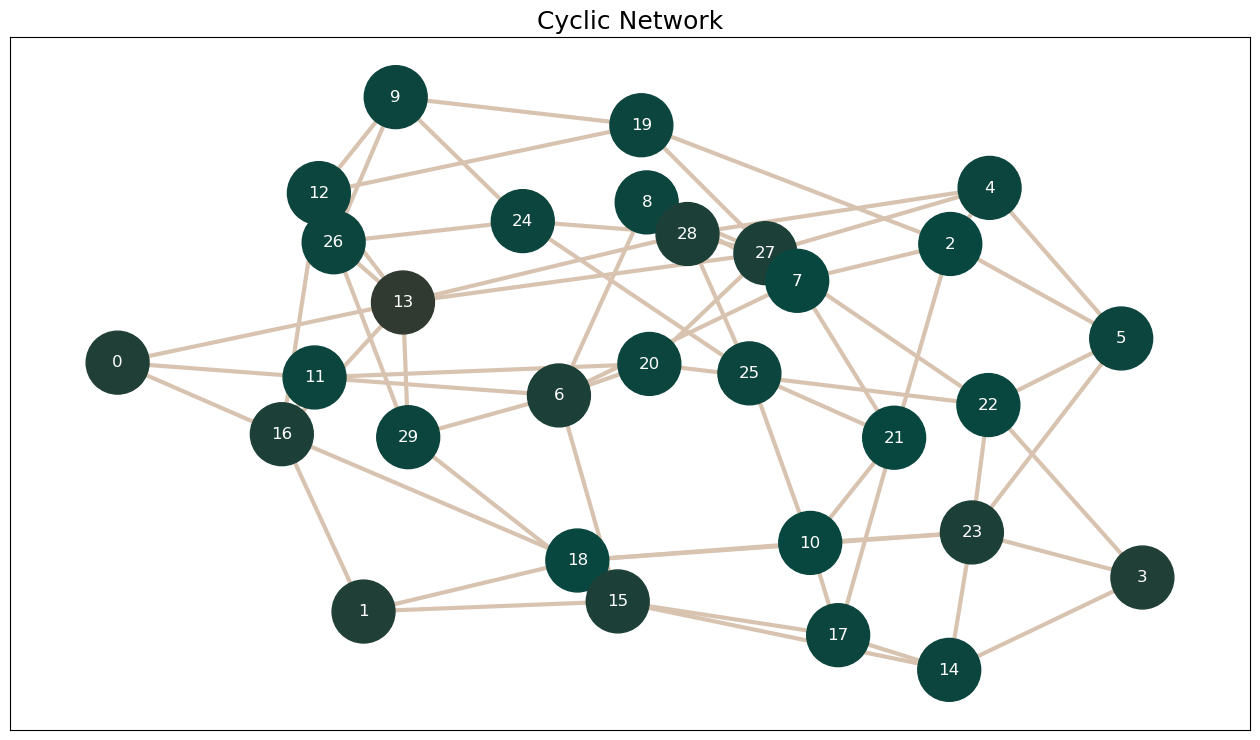

In [147]:
draw_ligand_network(network=cyclic_network, title=cyclic_network.name);

# Maximally connected network

In [148]:
import logging
from konnektor.network_planners import MaximalNetworkGenerator
from kartograf.atom_mapper import logger
logger.setLevel(logging.ERROR)

ligand_network_planner = MaximalNetworkGenerator(mapper=mapper, scorer=scorer, n_processes=3)

In [149]:
max_network = ligand_network_planner(components)
max_network.name = "Maximal Network"
max_network

<LigandNetwork-e261e918b2371e99df156af05b7ad1d7>

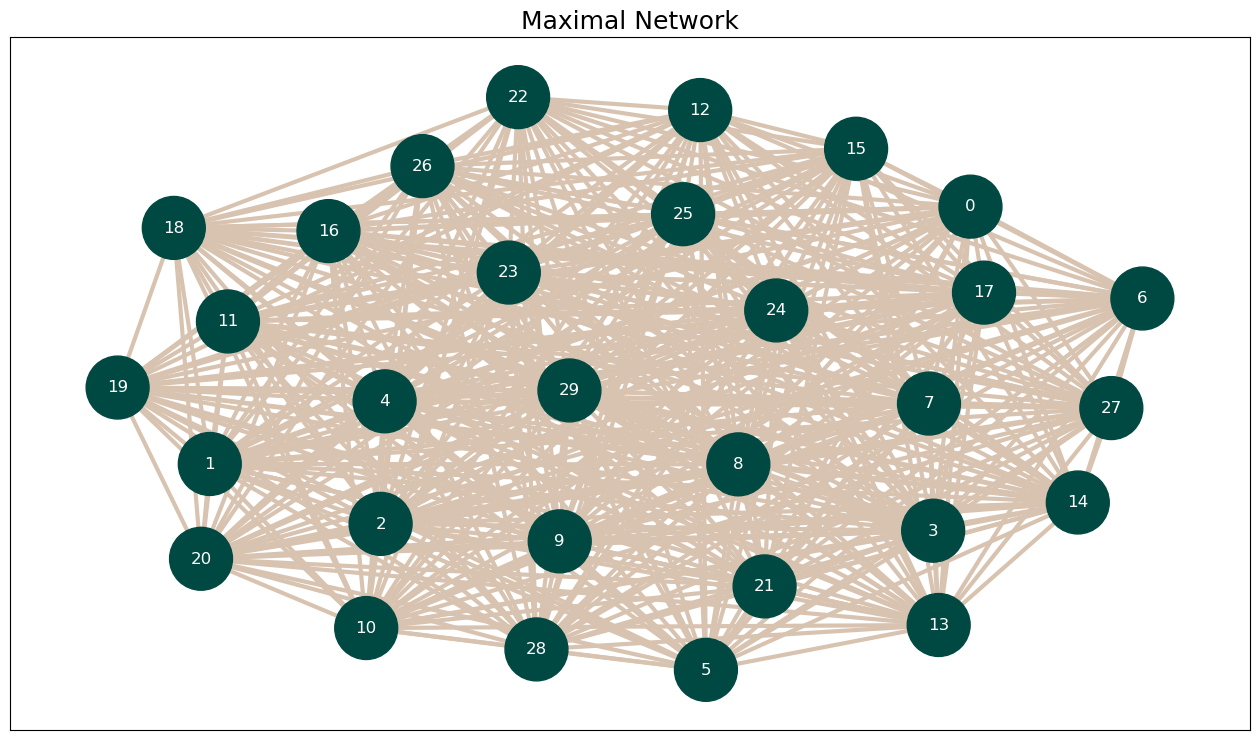

In [150]:
draw_ligand_network(network=max_network, title=max_network.name);

In [151]:
# Heuristic Maximal Network

In [152]:
import logging
from konnektor.network_planners import HeuristicMaximalNetworkGenerator
from kartograf.atom_mapper import logger
logger.setLevel(logging.ERROR)

ligand_network_planner = HeuristicMaximalNetworkGenerator(mapper=mapper, scorer=scorer, n_processes=3, n_samples=10)

In [153]:
hmax_network = ligand_network_planner(components)
hmax_network.name = "Heuristic Maximal\nNetwork"
hmax_network

<LigandNetwork-5ae00b804ab4492dc5e3cad670e202b7>

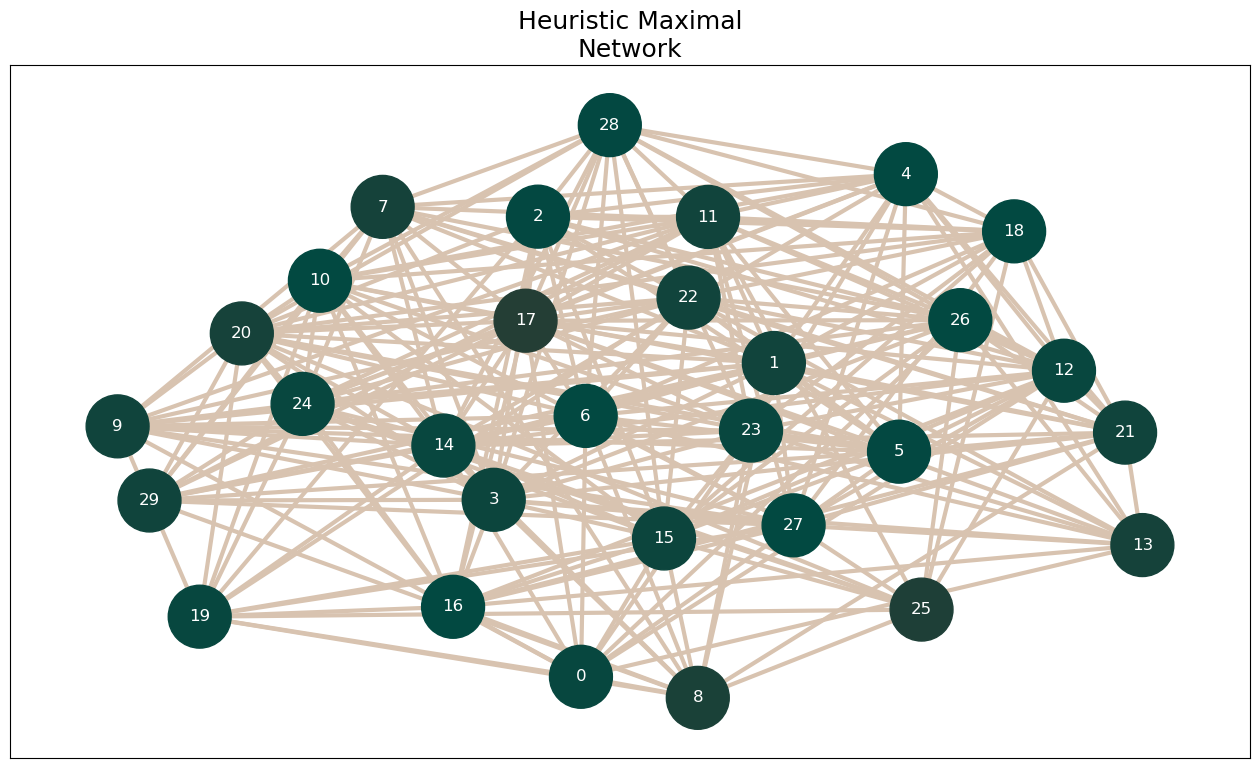

In [154]:
draw_ligand_network(network=hmax_network, title=hmax_network.name);

# Diversity Cluster Network

In [155]:
from konnektor.network_planners import ClusteredNetworkGenerator
from konnektor.network_planners import CyclicNetworkGenerator
from konnektor.network_planners import MstConcatenator

sub_network_planner = CyclicNetworkGenerator(mapper=mapper, scorer=scorer)
network_concatenator = MstConcatenator(mapper=mapper, scorer=scorer)
ligand_network_planner = ClusteredNetworkGenerator(sub_network_planners=sub_network_planner, concatenator=network_concatenator)

In [156]:
div_network = ligand_network_planner(components)
div_network.name = "Diversity Clustering\nNetwork"
div_network

ERR list index out of range


<LigandNetwork-36ea39944b0e26fcfba5f20a2079862d>

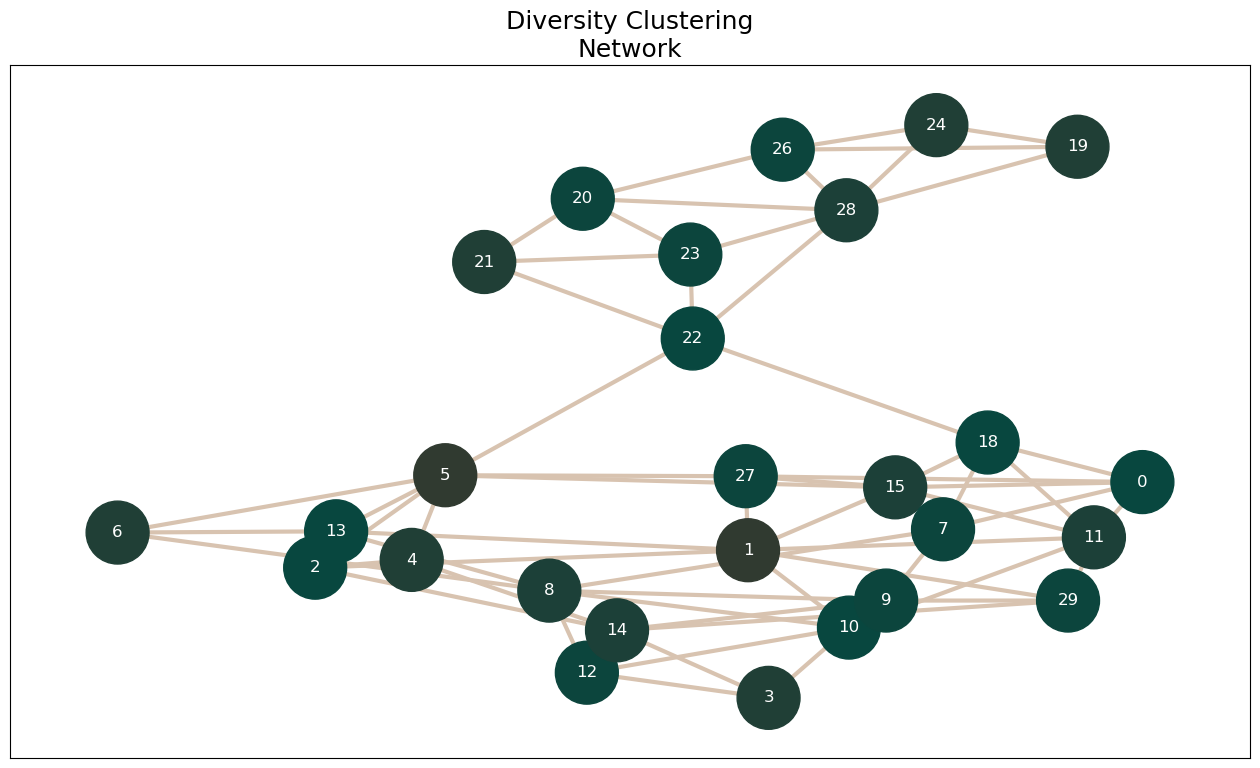

In [157]:
draw_ligand_network(network=div_network, title=div_network.name);

# Summary

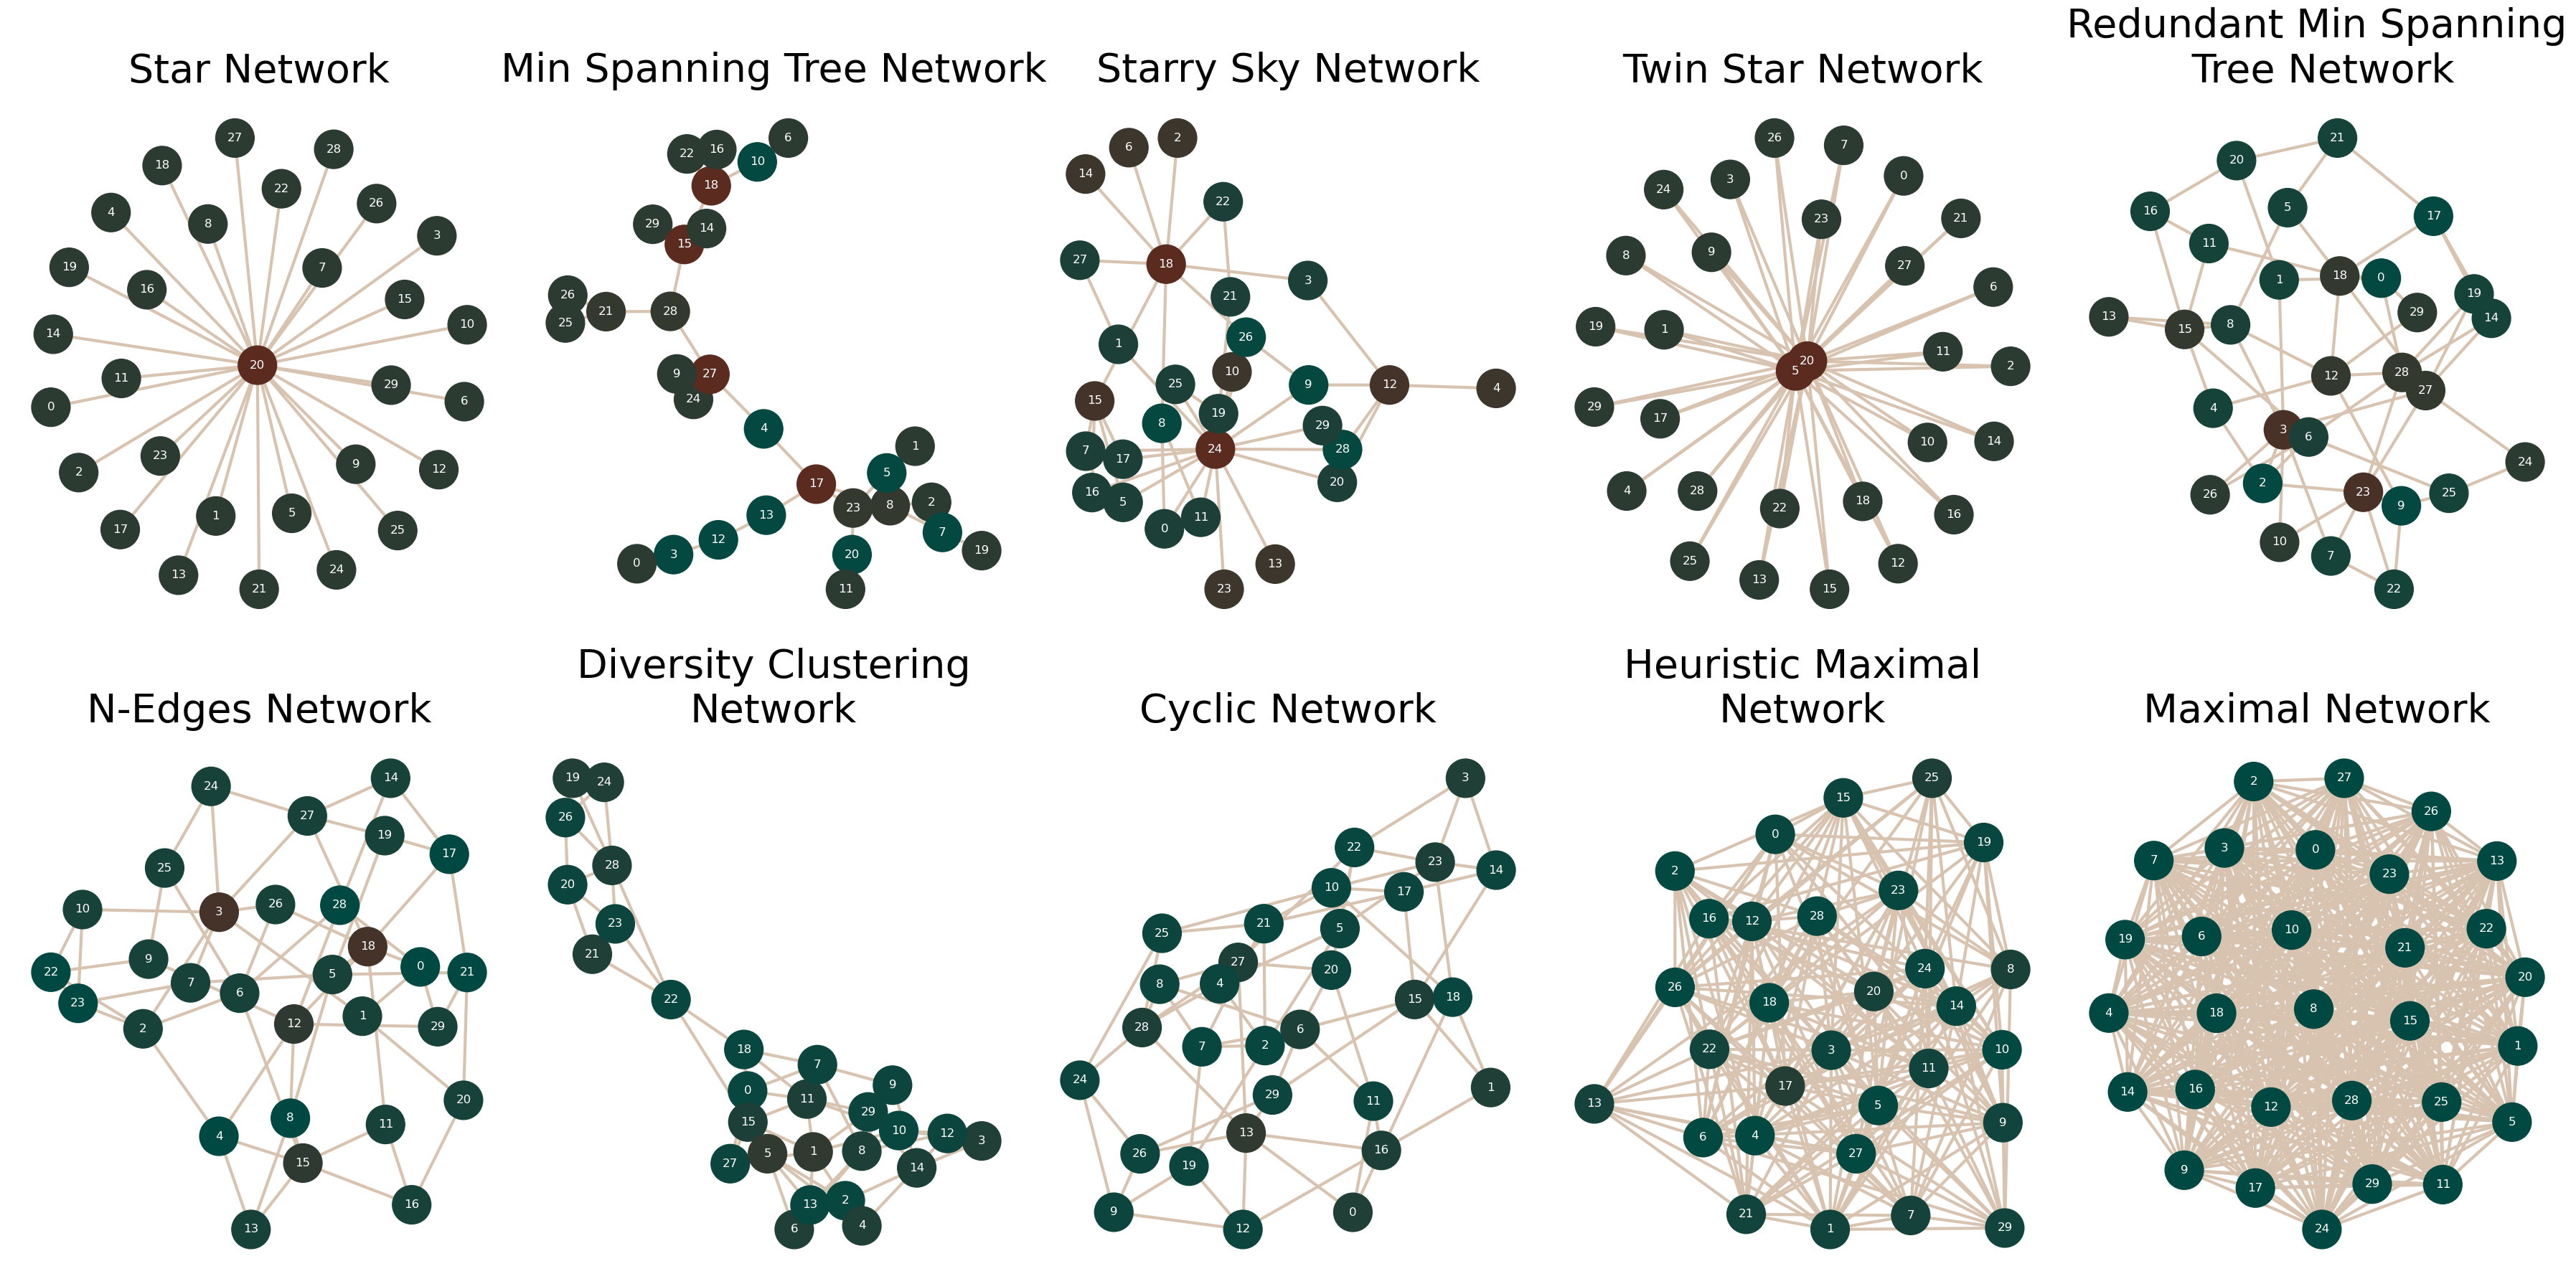

In [158]:
networks = [star_network,  twin_star_network, starry_sky_network,  
                         mst_network, nedges_network, rmst_network,
                          cyclic_network, div_network,
                          hmax_network, max_network]

networks = list(sorted(networks, key=lambda x: len(x.edges)))

from matplotlib import pyplot as plt
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=[9*4,2*9])
axes= np.array(axes).flat
fs = 22
for ax, net in zip(axes, networks):
    draw_ligand_network(network=net, title=net.name, ax=ax, node_size=1500, fontsize=40)
    ax.axis("off")
axes[-1].axis("off");
fig.tight_layout()


In [159]:
# NBVAL_SKIP
fig.savefig("../.img/network_layouts.png", dpi=400)